# 전처리

In [1]:
import pandas as pd

In [10]:
ns = pd.read_csv(r'C:\Users\Lee seohyun\Downloads\남산의부장들.csv',encoding='cp949')
ns

,Unnamed: 0,time,ID,text,score,like,dislike,watch_movie
0,0,2020-01-23 14:55:00,erlo****,김재규를 미화하지않고객관적이며 인간적으로 묘사했던게 좋았고무엇보다 머머리를 좀도둑놈...,10,6466,2080,True
1,1,2020-01-22 15:55:00,빛그림(namj****),연기 잘 하는 배우가 모여있습니다,10,5118,1432,True
2,2,2020-01-22 10:10:00,쩡(jeon****),이 영화는 이병헌 연기의 최정점을 볼 수 있다ㄷㄷ 한 장면 한 장면 긴장감을 놓을 ...,10,4594,1695,True
3,3,2020-01-22 20:29:00,Joonseosa(myeo****),오랜만에 볼만한 한국영화!이성민 배우님 박통 연기 소름돋았습니다,10,3792,1244,True
4,4,2020-01-22 11:19:00,ㅎㅎㅎ(eorm****),다 좋은데 마지막에 뭐냐; 전두환이 돈 챙겨가는거ㅋㅋㅋ개찐빠네 마지막이,10,3500,984,True
...,...,...,...,...,...,...,...,...
18027,18027,2020-01-23 17:57:00,헤드브레이커(yytt****),5년 뒤 봉하마을의 부엉이들 이라는 영화도 꼭 만들어라 ㅋㅋㅋㅋ 진짜 좌파쓰레기들 ...,1,19,3477,False
18028,18028,2020-01-24 20:42:00,랴퓨타(suwa****),대깨문개돼지들의 사회주의세상을 한걸음 앞당긴영화,1,82,3562,False
18029,18029,2020-02-22 16:34:00,푸른잎(ilin****),언제까지 민족의 영웅을 유치한 독재자로 치부하는 이런 빨갱이들이 만든 영화를 봐야하...,1,13,3537,False
18030,18030,2020-02-18 21:55:00,마부위침(jama****),빨갱이들이 만든 빨간 거짓말 가득한 빨갱이 영화...문재인이 부엉이바위에서 노무현이...,1,23,3770,False


In [12]:
ns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18032 entries, 0 to 18031
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   18032 non-null  int64 
 1   time         18032 non-null  object
 2   ID           18032 non-null  object
 3   text         16084 non-null  object
 4   score        18032 non-null  int64 
 5   like         18032 non-null  int64 
 6   dislike      18032 non-null  int64 
 7   watch_movie  18032 non-null  bool  
dtypes: bool(1), int64(4), object(3)
memory usage: 1003.9+ KB


In [14]:
#null값 확인
ns.isnull().sum()

Unnamed: 0        0
time              0
ID                0
text           1948
score             0
like              0
dislike           0
watch_movie       0
dtype: int64

In [16]:
#text null값 제거
ns = ns.dropna(axis=0)
ns = ns.reset_index(drop=True)
ns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16084 entries, 0 to 16083
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   16084 non-null  int64 
 1   time         16084 non-null  object
 2   ID           16084 non-null  object
 3   text         16084 non-null  object
 4   score        16084 non-null  int64 
 5   like         16084 non-null  int64 
 6   dislike      16084 non-null  int64 
 7   watch_movie  16084 non-null  bool  
dtypes: bool(1), int64(4), object(3)
memory usage: 895.4+ KB


In [17]:
ns = ns.drop_duplicates(['ID','text','time'],ignore_index=True)

In [18]:
ns.info() #중복댓글31개 제거

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16053 entries, 0 to 16052
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   16053 non-null  int64 
 1   time         16053 non-null  object
 2   ID           16053 non-null  object
 3   text         16053 non-null  object
 4   score        16053 non-null  int64 
 5   like         16053 non-null  int64 
 6   dislike      16053 non-null  int64 
 7   watch_movie  16053 non-null  bool  
dtypes: bool(1), int64(4), object(3)
memory usage: 893.7+ KB


In [19]:
#한글자음,숫자,영어 제거 
import re
ns['text'] = [re.sub('[^A-Za-z0-9가-힣]', ' ', s) for s in ns['text']]

In [24]:
# &#34; -> "
# &#39 -> '
# &gt; -> >
# &lt; -> <
index = ns['text'][ns['text'].str.contains('&#34;')==True].index
index

ind_list = list(index)
ind_list

for i in ind_list:
    ns['text'][i] = ns['text'][i].replace('&#34;','"')

In [25]:
ns.to_csv('남산의부장들전처리후.csv',encoding='CP949')

# EDA

In [27]:
df= pd.read_csv('남산의부장들전처리후.csv',encoding='cp949')
df

,time,ID,text,score,like,dislike,watch_movie
0,2020-01-23 14:55,erlo****,김재규를 미화하지않고객관적이며 인간적으로 묘사했던게 좋았고무엇보다 머머리를 좀도둑놈...,10,6466,2080,True
1,2020-01-22 15:55,빛그림(namj****),연기 잘 하는 배우가 모여있습니다,10,5118,1432,True
2,2020-01-22 10:10,쩡(jeon****),이 영화는 이병헌 연기의 최정점을 볼 수 있다 한 장면 한 장면 긴장감을 놓을 ...,10,4594,1695,True
3,2020-01-22 20:29,Joonseosa(myeo****),오랜만에 볼만한 한국영화 이성민 배우님 박통 연기 소름돋았습니다,10,3792,1244,True
4,2020-01-22 11:19,ㅎㅎㅎ(eorm****),다 좋은데 마지막에 뭐냐 전두환이 돈 챙겨가는거 개찐빠네 마지막이,10,3500,984,True
...,...,...,...,...,...,...,...
16048,2020-01-23 17:57,헤드브레이커(yytt****),5년 뒤 봉하마을의 부엉이들 이라는 영화도 꼭 만들어라 진짜 좌파쓰레기들 ...,1,19,3477,False
16049,2020-01-24 20:42,랴퓨타(suwa****),대깨문개돼지들의 사회주의세상을 한걸음 앞당긴영화,1,82,3562,False
16050,2020-02-22 16:34,푸른잎(ilin****),언제까지 민족의 영웅을 유치한 독재자로 치부하는 이런 빨갱이들이 만든 영화를 봐야하...,1,13,3537,False
16051,2020-02-18 21:55,마부위침(jama****),빨갱이들이 만든 빨간 거짓말 가득한 빨갱이 영화 문재인이 부엉이바위에서 노무현이...,1,23,3770,False


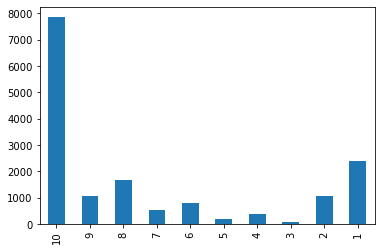

In [28]:
#평점분포
import matplotlib.pyplot as plt
import seaborn as sns
df['score'].value_counts().sort_index(ascending=False).plot(kind='bar')
plt.show()

In [29]:
#실관람객만 추출 -> 데이터프레임
watch_df = df[df['watch_movie']==True]
watch_df = watch_df.reset_index(drop=True)
watch_df

,time,ID,text,score,like,dislike,watch_movie
0,2020-01-23 14:55,erlo****,김재규를 미화하지않고객관적이며 인간적으로 묘사했던게 좋았고무엇보다 머머리를 좀도둑놈...,10,6466,2080,True
1,2020-01-22 15:55,빛그림(namj****),연기 잘 하는 배우가 모여있습니다,10,5118,1432,True
2,2020-01-22 10:10,쩡(jeon****),이 영화는 이병헌 연기의 최정점을 볼 수 있다 한 장면 한 장면 긴장감을 놓을 ...,10,4594,1695,True
3,2020-01-22 20:29,Joonseosa(myeo****),오랜만에 볼만한 한국영화 이성민 배우님 박통 연기 소름돋았습니다,10,3792,1244,True
4,2020-01-22 11:19,ㅎㅎㅎ(eorm****),다 좋은데 마지막에 뭐냐 전두환이 돈 챙겨가는거 개찐빠네 마지막이,10,3500,984,True
...,...,...,...,...,...,...,...
1921,2020-01-31 2:19,TAF(tck8****),대한민국을 건국한 이승만대통령 그리고 당시 피죽도 먹기 힘들고 늘상 끼니를 걱정하...,4,9,41,True
1922,2020-01-28 11:30,villa(qkrw****),이병헌은 연기의 신이다,9,6,47,True
1923,2020-02-05 15:33,qhr0****,OOO이란 정권 너무 한것 같다 이나라 살아있는게 다행이지그러니 힘없고 가난한 사람...,9,7,49,True
1924,2020-01-23 17:07,INKIMANAGA(theh****),마지막 수정동 절정 시퀀스에 이병헌 긴장한연기 너무 몰입한거아님 얼굴이다 창백하던...,8,585,992,True


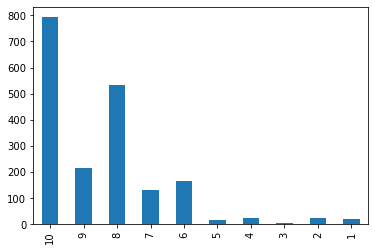

In [30]:
#실관람객 평점분포
watch_df['score'].value_counts().sort_index(ascending=False).plot(kind='bar')
plt.show()

# 누적평점

In [4]:
venom = pd.read_csv(r'C:\Users\Lee seohyun\downloads\베놈.csv',encoding='cp949')
venom

,Unnamed: 0,time,ID,text,score,like,dislike,watch_movie
0,0,2018-10-03 10:46:00,BoneCat(cree****),아싸둘이서 인싸되니까 기분좋아서 지구에 남는 영화,4,5736,691,False
1,1,2018-10-03 09:06:00,사랑돼지(love****),재밌나요? 재밌으면 추천 재미없으면 비추 눌러주세요,10,5207,1814,False
2,2,2018-10-03 09:09:00,songjimin(song****),그리 까내릴 정도는 아닌데.. 충분히 볼 만했어요!,10,3339,462,False
3,3,2018-10-03 09:53:00,까꿍(tldl****),얘들아 뭔가 착각하는 모양인데 이거 마블영화가 아니라 소니 영화야 ㅋㅋ8,7,3183,758,False
4,4,2018-10-03 09:18:00,Guest(gksw****),청불로 갔어야 했다 완전 애들용 베놈임,7,2764,494,False
...,...,...,...,...,...,...,...,...
14293,14293,2020-03-22 12:30:00,123(alpa****),ㅁㅊ개노잼 인도인지 이라크인지 검튀들이 비중잇게나와서 개노잼 차라리 흑인을 써라 아...,1,2,11,False
14294,14294,2018-10-03 09:49:00,최광수(cksc****),마블영화!과학이일궈넨 산물임엔 틀림없다.,10,22,32,True
14295,14295,2018-10-05 06:04:00,하얀날개(kje0****),포스터왜케징그러움? 토나와서보기시름ㅡㅡ,1,1,13,False
14296,14296,2018-10-06 15:11:00,넥슨은다람쥐를뿌려라(gudd****),구라안치고 노잼입니다 절대보지마세요 이글 보고도 가서 베놈보면 개돼지,1,3,18,False


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

In [5]:
#날짜만 받아서 칼럼으로 추가, 날짜별 평균평점 도출
date=[]
for i in range(len(venom)):
    date.append(venom['time'][i][:9])
venom['date']=pd.Series(date)
venom_da=venom[venom['watch_movie']==True].groupby('date')['score'].mean()

In [23]:
venom_da

date
2018-10-0     8.316388
2018-10-1     8.176860
2018-10-2     8.221014
2018-10-3     7.857143
2018-11-0     8.115044
2018-11-1     7.937500
2018-11-2     8.000000
2018-11-3     8.666667
2018-12-0     7.781250
2018-12-1     7.736842
2018-12-2     7.878049
2018-12-3     8.176471
2019-01-0     8.000000
2019-01-1     8.636364
2019-01-2     8.312500
2019-01-3     8.500000
2019-02-0     8.115385
2019-02-1     7.750000
2019-02-2     7.888889
2019-03-0     8.173913
2019-03-1     7.818182
2019-03-2     8.000000
2019-03-3     8.000000
2019-04-0     9.000000
2019-04-2     6.000000
2019-05-1     8.500000
2019-06-0     8.000000
2019-06-1    10.000000
2019-11-1     6.000000
2020-08-2     8.000000
Name: score, dtype: float64

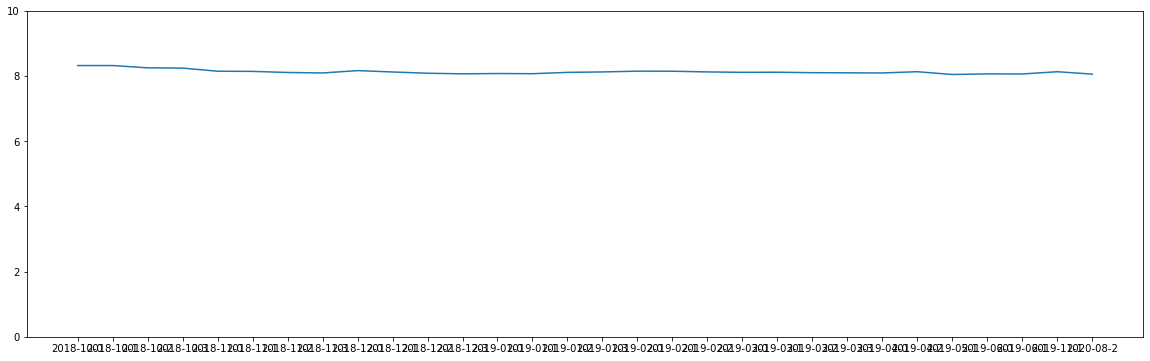

In [9]:
#시각화
venom_da_mo=DataFrame(venom_da[:100])
stackavg=[]
stackavg.append(venom_da_mo['score'][0])
for j in range(len(venom_da_mo)-1):
    stackavg.append(np.mean(venom_da_mo['score'][:j+1]))
venom_da_mo['cum_mean']=stackavg
plt.figure(figsize=(20,6))
plt.plot(venom_da_mo.index,venom_da_mo['cum_mean'])
plt.ylim(0,10)
plt.show()


In [ ]:
#암수살인

In [25]:
venom = pd.read_csv(r'C:\Users\Lee seohyun\downloads\암수살인.csv',encoding='cp949')
venom

,Unnamed: 0,time,ID,text,score,like,dislike,watch_movie
0,0,2018-10-03 10:41:00,dmswls311(tmdr****),조조로 보고옴. 잔인한 장면 없고 흥미위주의 범죄묘사도 없었음. 보통 흔히 생각하는...,10,2723,313,False
1,1,2018-10-03 09:00:00,조아라(pigm****),유가족문제 서로 잘 해결했는데 모르고 1점테러할 흑우 없지??,10,2738,646,False
2,2,2018-10-03 13:45:00,apotheosis(qkrw****),어디있노... 니..,10,1759,110,True
3,3,2018-10-03 10:55:00,시영진(siyj****),잔인한 장면없이 추격씬없이도 범죄영화는 이렇게 잘만들수있다.,10,1676,131,False
4,4,2018-10-03 13:51:00,q1234567(shad****),세상에 돌아이들 많으니 어깨 부딪히거나 사소한 시비 붙으면 그냥 참고 넘어가세요. ...,10,1583,77,False
...,...,...,...,...,...,...,...,...
13097,13097,2018-10-03 17:52:00,진입금지(tg10****),방금 보고옴. 노잼요.김윤석 연기 빼곤 그냥 그래요. 주지훈은 연기 못하고 일단 배...,4,2,12,False
13098,13098,2018-10-03 11:19:00,남주혁(mbsk****),암수살인 공감 vs 베놈 비공,8,3,13,False
13099,13099,2019-09-13 21:54:00,kimjinny(sui8****),주지훈 사투리 너무 어색해서 몰입안됨..,7,7,17,False
13100,13100,2018-10-03 09:17:00,ANoK(h598****),"ㅎㅎ..,..,,..",1,8,19,False


In [26]:
date=[]
for i in range(len(venom)):
    date.append(venom['time'][i][:9])
venom['date']=pd.Series(date)
venom_da=venom[venom['watch_movie']==True].groupby('date')['score'].mean()

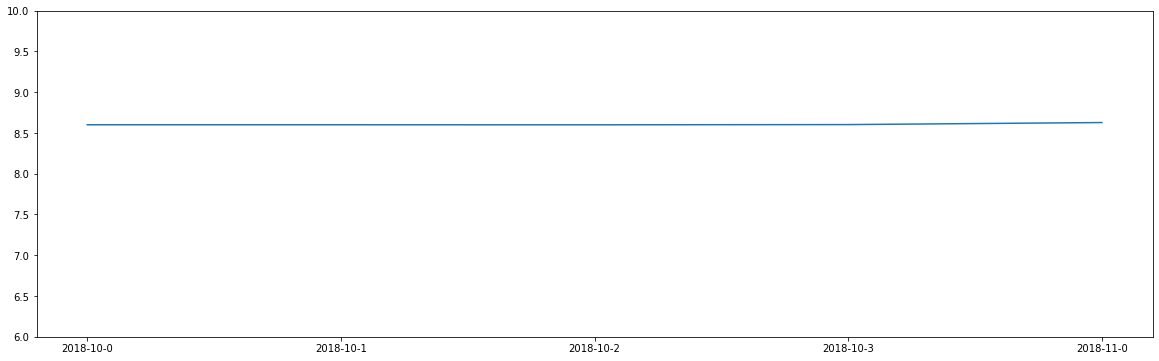

In [28]:
venom_da_mo=DataFrame(venom_da[:5])
stackavg=[]
stackavg.append(venom_da_mo['score'][0])
for j in range(len(venom_da_mo)-1):
    stackavg.append(np.mean(venom_da_mo['score'][:j+1]))
venom_da_mo['cum_mean']=stackavg
plt.figure(figsize=(20,6))
plt.plot(venom_da_mo.index,venom_da_mo['cum_mean'])
plt.ylim(6,10)
plt.show()
